# Plots for Tic-Tac-Toe Game Stats

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = "./stats/results_log.csv"

try:
    data = pd.read_csv(path)
except FileNotFoundError:
    data = pd.DataFrame(columns=[
        "Game ID",
        "Player X",
        "Name X",
        "Player O",
        "Name O",
        "Move",
        "Winning Side",
        "Winner Name",
    ])

data

,Game ID,Player X,Name X,Player O,Name O,Move,Winning Side,Winner Name
0,1,Human,davy,Bot,gab,9,X,davy
1,2,Human,davy,Bot,gab,9,X,davy
2,3,Human,davy,Bot,gab,9,Tie,NaN
3,4,Human,davy,Bot,gab,8,O,gab
4,5,Bot,davy,Human,gab,6,O,gab
...,...,...,...,...,...,...,...,...
77,78,Bot,davy,Bot,gab,8,O,gab
78,79,Bot,davy,Bot,gab,7,X,davy
79,80,Bot,davy,Bot,gab,6,X,davy
80,81,Bot,davy,Bot,gab,8,O,gab


## Plot 1: X VS O: Does order matter?

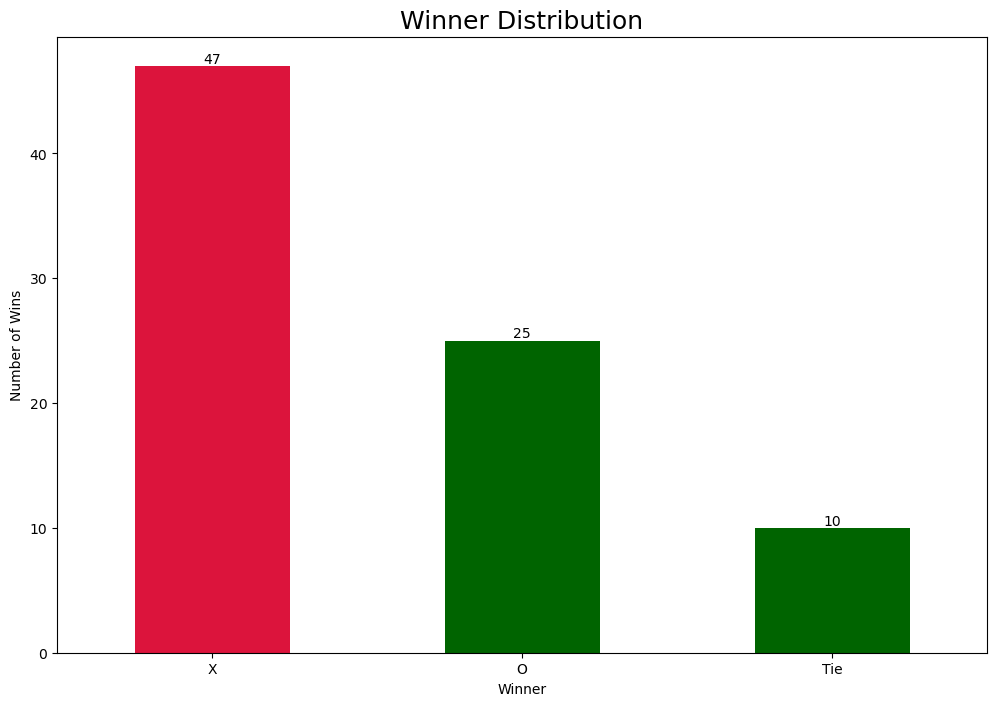

In [7]:
ratio = data['Winning Side'].value_counts()

fig, ax = plt.subplots(figsize=(12, 8))
ratio.plot.bar(rot=0, color=['crimson', 'darkgreen', 'darkgreen'])

ax.set_xlabel('Winner')
ax.set_ylabel('Number of Wins')
ax.set_title('Winner Distribution', fontsize=18)
plt.bar_label(ax.containers[0], label_type='edge')

plt.show()

From the bar chart generated, we can clearly see that X wins significantly more.
Since X plays first, it indicates that the result is correlated with the game order.

## Plot 2: Bot VS Bot: Is order in the play?

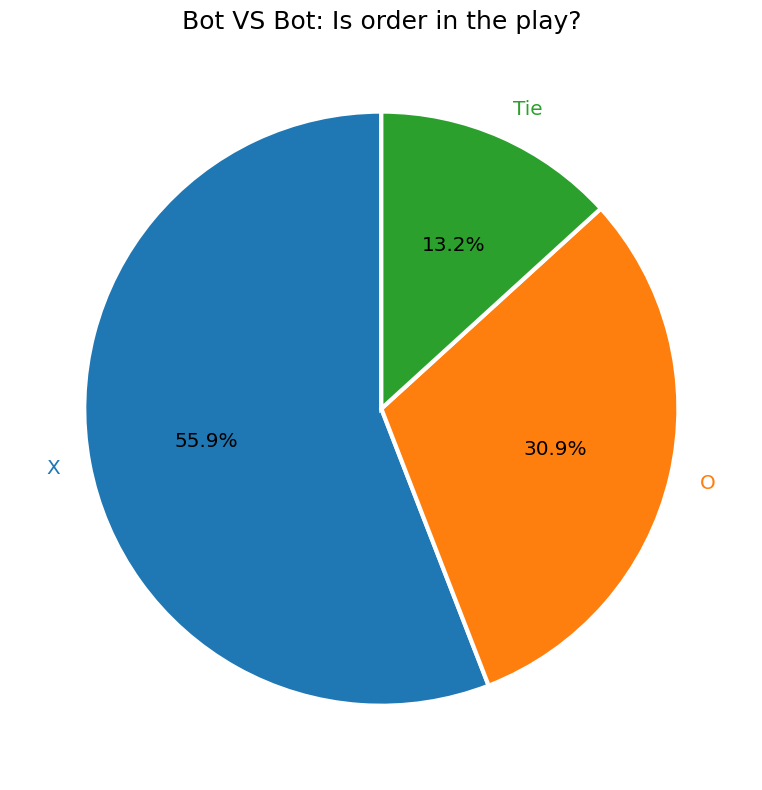

In [5]:
both_bot = data[(data['Player X'] == 'Bot') & (data['Player O'] == 'Bot')]
ratio_bot = both_bot['Winning Side'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(12, 8))
patches, texts, pcts = ax.pie(
        ratio_bot, labels=['X', 'O', 'Tie'], autopct='%.1f%%',
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'size': 'x-large'},
        startangle=90)

for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
ax.set_title('Bot VS Bot: Is order in the play?', fontsize=18)

plt.tight_layout()

From the pie chart generated above, it's evident that X, who plays first, still wins significantly more.
It can be concluded that order and result is correlated regardless of player type -- who plays first stands a bigger chance to win.

## Plot 3: Human VS Bot: Who wins more?

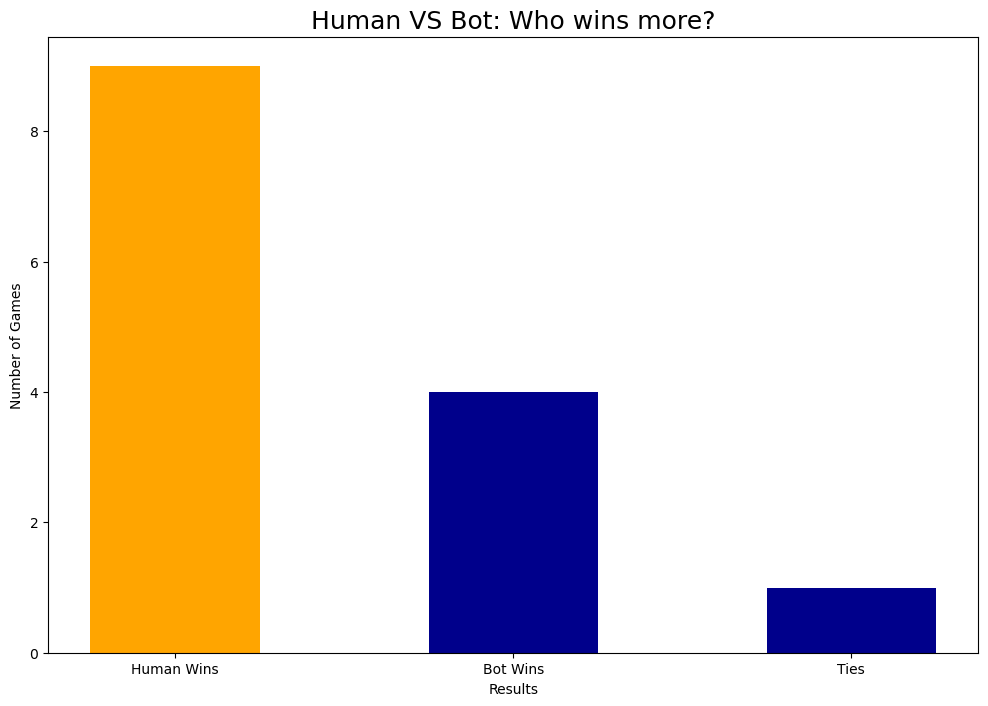

In [8]:
        human_wins = (
                (data['Player X'] == 'Human') & (data['Player O'] == 'Bot') &
                (data['Winning Side'] == 'X') | (data['Winning Side'] == 'O') &
                (data['Player O'] == 'Human') & (data['Player X'] == 'Bot')
        )
        bot_wins = (
                (data['Player X'] == 'Human') & (data['Player O'] == 'Bot') &
                (data['Winning Side'] == 'O') | (data['Winning Side'] == 'X') &
                (data['Player O'] == 'Human') & (data['Player X'] == 'Bot')
        )
        ties = (
                (data['Winning Side'] == 'Tie') &
                ((data['Player O'] == 'Human') & (data['Player X'] == 'Bot') |
                 (data['Player X'] == 'Human') & (data['Player O'] == 'Bot'))
        )

        count = [sum(human_wins), sum(bot_wins), sum(ties)]
        result = ['Human Wins', 'Bot Wins', 'Ties']
        palette = ['orange', 'darkblue', 'darkblue']

        plt.figure(figsize=(12, 8))
        plt.bar(result, count, width=0.5, color=palette)

        plt.xlabel('Results')
        plt.ylabel('Number of Games')
        plt.title('Human VS Bot: Who wins more?', fontsize=18)

        plt.show()

It is obvious in the bar chart that human wins more than the bot, regardless of order.
The possible reasons include:
* human players have more solid reasoning than bots, which randomly pick available spots to move
* human players prefer to play first more, which according to our previous conclusion, is correlated with wins